In [10]:
import matplotlib.pyplot as plt
from typing import Tuple, List, Dict, Iterator
from numba import njit
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, interact_manual
from ipywidgets import IntSlider, FloatSlider

In [7]:
@njit
def chaos(iterations: int, rate: float, x: float) -> Iterator[float]:
    update = lambda x: rate * x * (1 - x)
    x = update(x)
    for _ in range(iterations):
        x = update(x)
        yield x


@njit
def populate_chaos(shape: Tuple[int], x: float) -> np.array:
    arr = np.zeros(shape=shape)
    p = np.array([3, 4]) * shape[0]
    for ix, r in enumerate(range(p[0], p[1], 1)):
        for iy, v in enumerate(
                chaos(iterations=shape[1], rate=r / shape[0], x=x)):
            arr[ix][iy] = v
    return arr


def plot_chaos(r: int, x: float) -> None:
    arr = populate_chaos(shape=(1000, 10000), x=x)
    plt.figure(figsize=(30, 10))
    plt.scatter(range(len(arr[r])), arr[r], s=0.2)
    plt.show()

    
interact_manual(
    plot_chaos,
    x=FloatSlider(min=0, max=1, step=0.01, value=0.5),
    r=IntSlider(min=400, max=700, step=1, value=500),
)

interactive(children=(IntSlider(value=500, description='r', max=700, min=400), FloatSlider(value=0.5, descript…

<function __main__.plot_chaos(r:int, x:float) -> None>

In [8]:
@njit
def lorenz(x: float,
           y: float,
           z: float,
           srb: Tuple[int, int, float] = (10, 28, 2.667)):
    s, r, b = srb
    x_dot = s * (y - x)
    y_dot = r * x - y - x * z
    z_dot = x * y - b * z
    return x_dot, y_dot, z_dot


@njit
def lorenz_gen(n_steps: int = 1000,
               positions=Tuple[float],
               srb=Tuple[int, int, float]
               ) -> Iterator[Tuple[float, float, float]]:
    dt = 0.01
    # Set initial values
    x, y, z = positions
    for i in range(n_steps):
        xd, yd, zd = lorenz(x, y, z, srb)
        x, y, z = x + xd * dt, y + yd * dt, z + zd * dt
        yield x, y, z


@njit
def populate_lorenz(n_steps: int = 10000,
                    positions: Tuple[int] = (0., 1., 1.5),
                    srb: Tuple[int, int, float] = (10, 28, 2.667)
                    ) -> Tuple[List[float], List[float], List[float]]:
    x, y, z = [], [], []
    for a, b, c in lorenz_gen(n_steps, positions, srb):
        x.append(a)
        y.append(b)
        z.append(c)
    return x, y, z


def plot_lorenz(s: int, r: int, b: float, x_angle: int = 30, y_angle: int = 180) -> None:
    x, y, z = populate_lorenz(10000, (0., -1., 5.), (s, r, b))
    fig = plt.figure(figsize=(20,20))
    ax = fig.gca(projection='3d')

    ax.plot(x, y, z, lw=0.5)
    ax.set_xlabel("X Axis")
    ax.set_ylabel("Y Axis")
    ax.set_zlabel("Z Axis")
    ax.set_title("Lorenz Attractor")

    ax.view_init(x_angle, y_angle)
    plt.show()
    

interact(
    plot_lorenz,
    s=IntSlider(min=10, max=30, step=1, value=12),
    r=IntSlider(min=10, max=30, step=1, value=20),
    b=FloatSlider(min=0, max=4, step=0.1, value=2.5),
    x_angle=IntSlider(min=0, max=360, step=1, value=30),
    y_angle=IntSlider(min=0, max=360, step=1, value=30),
)

interactive(children=(IntSlider(value=12, description='s', max=30, min=10), IntSlider(value=20, description='r…

<function __main__.plot_lorenz(s:int, r:int, b:float, x_angle:int=30, y_angle:int=180) -> None>

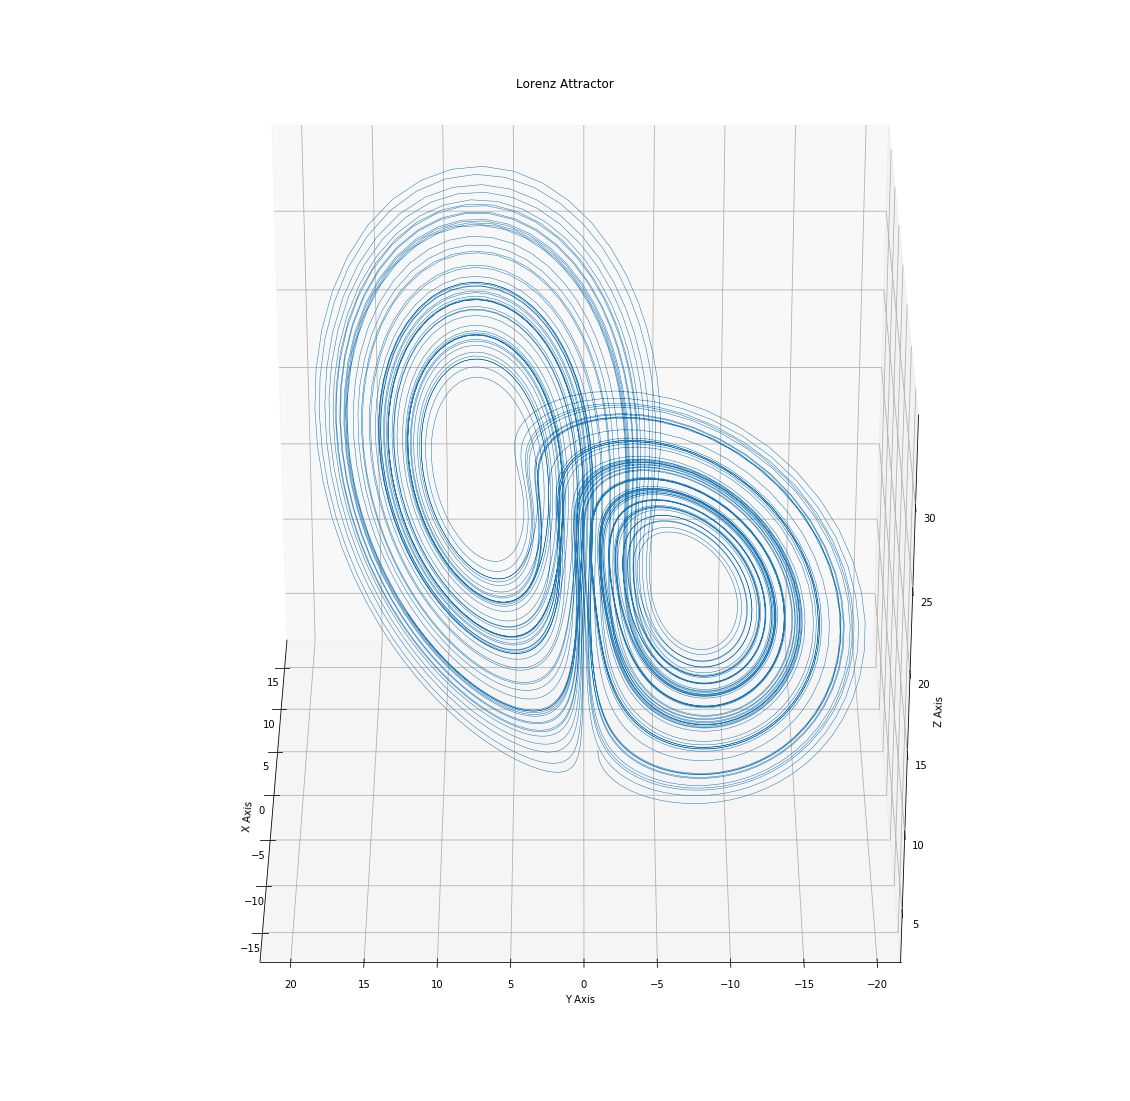

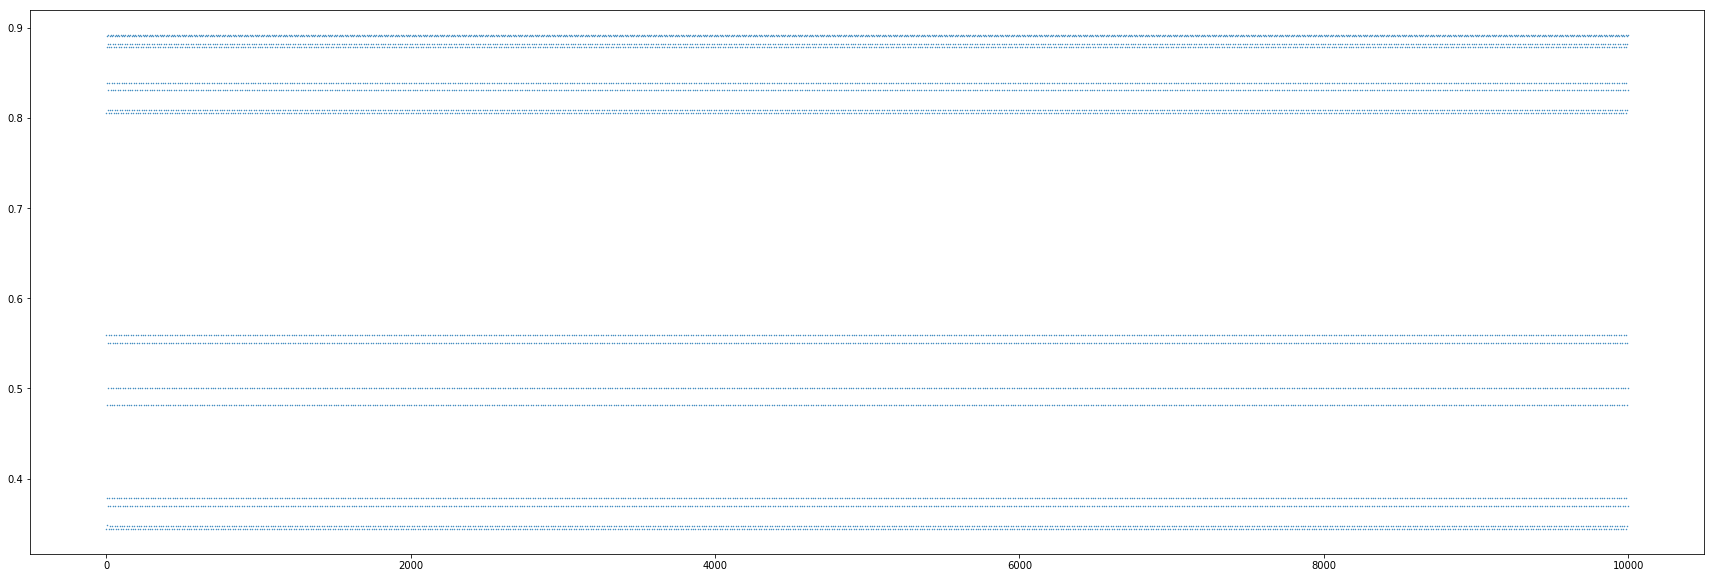

In [9]:
plot_lorenz(s=12, r=20, b=2.67)
plot_chaos(r=567, x=.5)